In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as ks
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Bidirectional, Lambda, Input
from tensorflow.keras.models import Model
plt.style.use('default')
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('sp500.csv')
print(df.shape)
df.head()

(2790, 5)


,Date,Close,Open,High,Low
0,2021/8/3,4423.15,4392.74,4423.79,4373.00
1,2021/8/2,4387.11,4406.86,4422.18,4384.81
2,2021/7/30,4395.26,4395.12,4412.25,4389.65
3,2021/7/29,4419.15,4403.59,4429.97,4403.59
4,2021/7/28,4400.65,4402.95,4415.47,4387.01


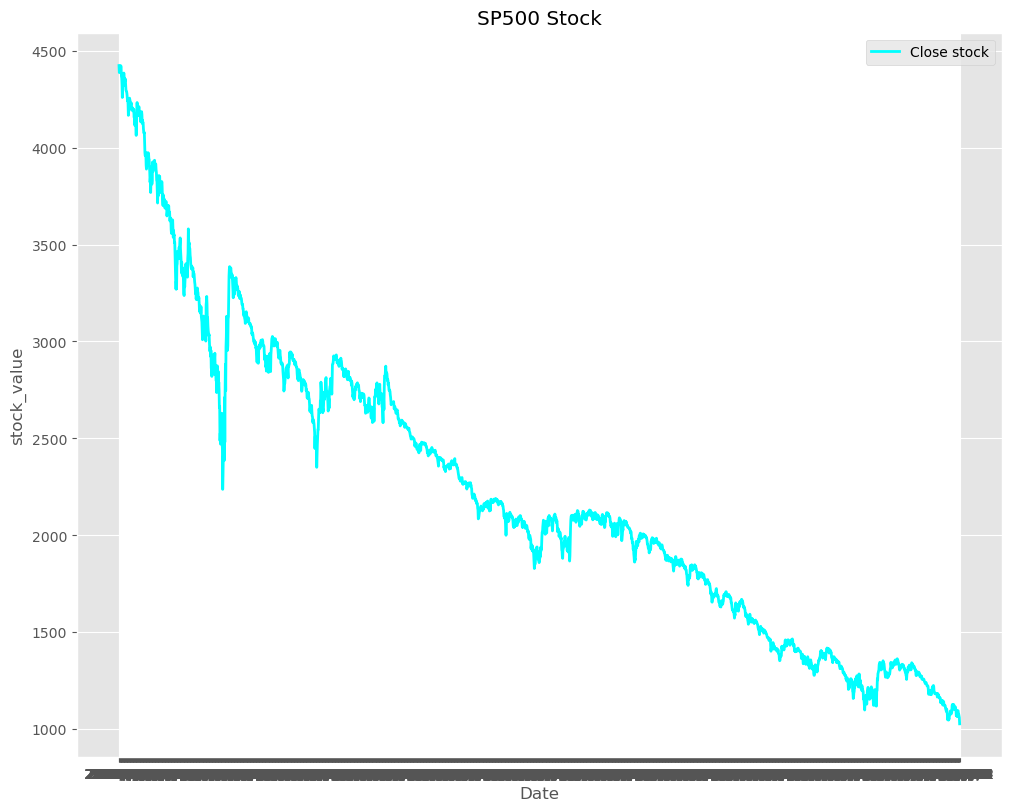

In [4]:
plt.figure(figsize=(10, 8), constrained_layout=True)
c = ['cyan']
y = ['Close']
l = 2.0
for j, c in zip(y, c):
  plt.plot(df['Date'], df[j], color=c, linewidth=l, label=f'{j} stock')
  plt.title('SP500 Stock')
  plt.xlabel('Date')
  plt.ylabel('stock_value')
  plt.legend()
  l -=0.5

plt.show()

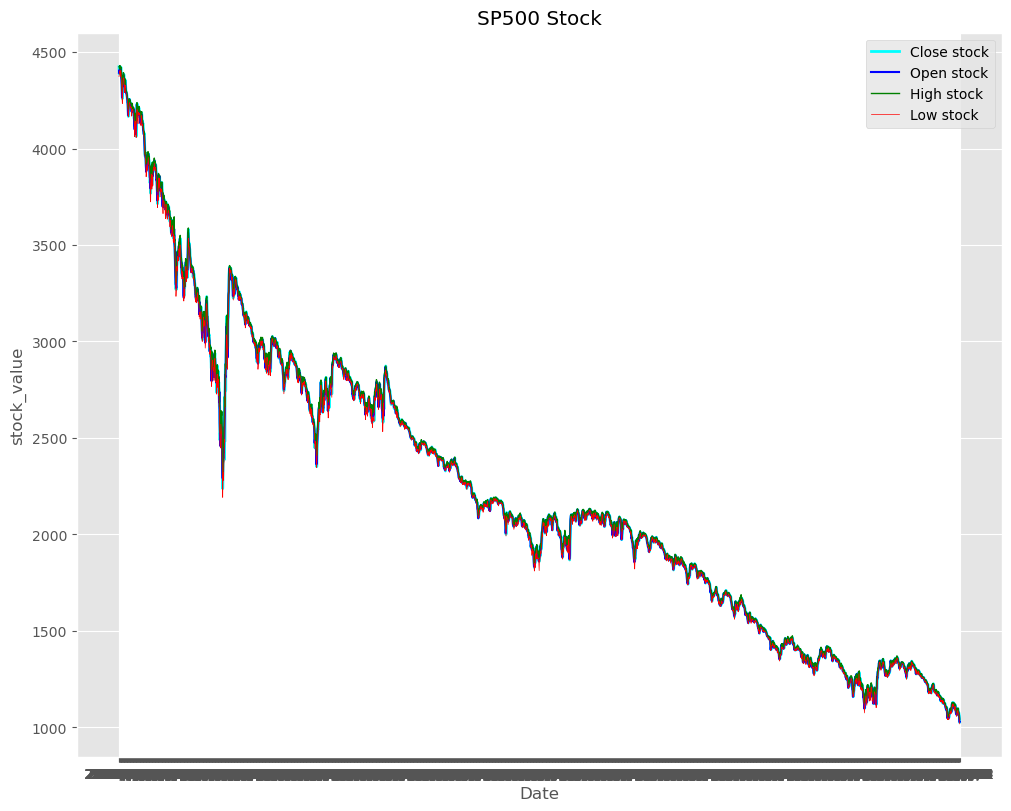

In [45]:
plt.figure(figsize=(10, 8), constrained_layout=True)
c = ['cyan', 'blue', 'green', 'red']
y = ['Close', 'Open', 'High', 'Low']
l = 2.0
for j, c in zip(y, c):
  plt.plot(df['Date'], df[j], color=c, linewidth=l, label=f'{j} stock')
  plt.title('SP500 Stock')
  plt.xlabel('Date')
  plt.ylabel('stock_value')
  plt.legend()
  l -=0.5

plt.show()

In [46]:
from PyEMD import CEEMDAN, Visualisation

In [47]:
close = df[['Close']].values

In [19]:
close

array([[4423.15],
       [4387.11],
       [4395.26],
       ...,
       [1070.25],
       [1060.27],
       [1028.06]])

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
close_norm = scaler.fit_transform(close)
close_norm

array([[0.01058623],
       [0.01050772],
       [0.00806072],
       ...,
       [0.81786181],
       [0.83063335],
       [1.        ]])

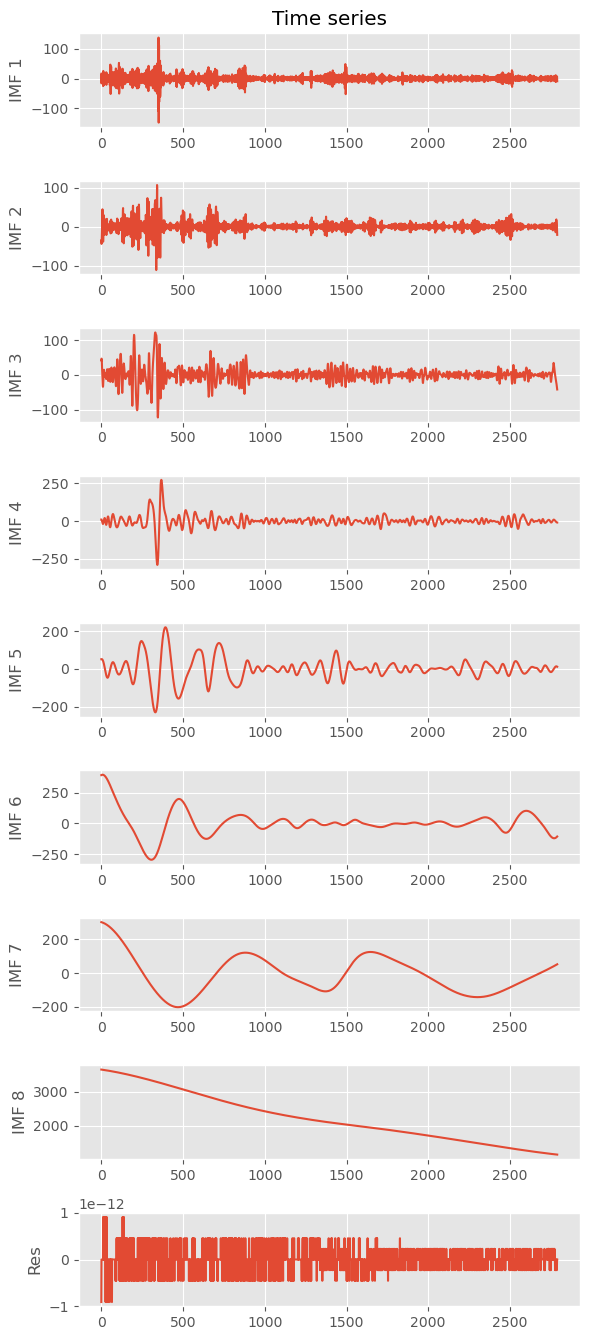

In [48]:
ceemdan = CEEMDAN()
ceemdan.ceemdan(close.reshape(-1))
imfs_close, res_close = ceemdan.get_imfs_and_residue()

t = np.arange(0, 2790, 1)
vis = Visualisation()
vis.plot_imfs(imfs=imfs_close, residue=res_close, t=t, include_residue=True)
# vis.plot_instant_freq(t, imfs=imfs)
vis.show()

In [11]:
imfs_close[1][2400:2440]

array([ -1.13749601,   0.59577737,   1.48986297,  -1.83562631,
        -4.68758346,  -2.33326495,   6.96532623,  15.12446972,
        15.26797543,   5.72340519,  -8.86732749, -21.81095523,
       -30.40376187, -34.92318589,  -7.13925342,  37.56693438])

In [49]:
# 取之前X_lag个数据来预测下一个数据
def time_slice(data,X_lag):
    sample = []
    label = []
    for k in range(len(data) - X_lag - 1):
        t = k + X_lag
        sample.append(data[k:t])
        label.append(data[t + 1])
    return sample,label


In [50]:
from sklearn.neural_network import MLPRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np

In [51]:
def implement_IR(X_train, y_train):
#     model = IsotonicRegression()  
    model = LinearRegression()
    model.fit(X_train,y_train)  # 训练模型
    
    return model

In [52]:
def split(sample, label, test_ratio):
    length = len(label)
    train_len = round((1-test_ratio)*length)
    
    X_train = sample[0:train_len]
    X_test = sample[train_len+1:length]
    y_train = label[0:train_len]
    y_test = label[train_len+1:length]
    
    X_train = np.asarray(X_train)
    X_test = np.asarray(X_test)
    y_train = np.asarray(y_train)
    y_test = np.asarray(y_test)
    
    return X_train, X_test, y_train, y_test

In [25]:
y_train.shape

NameError: name 'y_train' is not defined

In [53]:
X_train.shape

(1931, 1)

In [53]:
i = 1
svr = []
prediction = []
actual = []

for imf in imfs_close:
#     print('-'*45)
#     print('This is  ' + str(i)  + '  time(s)')
#     print('*'*45)
    
    # 生成time series dataset
    sample,label = time_slice(imf,30)
    
    # 数据集划分
#     X_train, X_test, y_train, y_test = train_test_split(sample, label, test_size=0.2, random_state=42)
    X_train, X_test, y_train, y_test = split(sample, label, 0.2)
    tmp = implement_IR(X_train, y_train)
    svr.append(tmp)
    actual.append(y_test)
    
    pre_tmp = tmp.predict(X_test)
    prediction.append(pre_tmp)
    
    i=i+1

In [27]:
prediction

[array([ 1.58632987e+00,  1.09650818e+00, -1.01832434e+00, -1.93017825e-01,
        -6.31251971e-01,  1.72712759e+00, -2.08384981e+00,  1.41913112e+00,
         9.60311833e-02, -1.74282871e-01,  1.35980801e+00, -1.05975712e+00,
        -4.01738870e-01,  1.98404220e+00, -1.47288472e+00,  7.68268385e-01,
         6.30501082e-02, -1.00679150e+00,  1.57103454e+00, -5.48723641e-01,
         1.19543335e+00, -1.15099240e+00,  8.16327593e-01, -1.22483703e-01,
         7.96542543e-01,  5.07575110e-01, -2.12748105e+00,  1.27694119e+00,
         7.05190250e-01,  1.54034824e-01, -1.30652976e+00, -2.27645238e-01,
        -2.63476668e+00,  3.87420301e+00, -2.51207957e-01,  1.70303548e+00,
         7.75543078e-01, -2.44968588e+00,  4.93230410e-01, -1.50416441e+00,
         1.05680625e+00, -1.02488837e+00,  1.91977535e+00, -3.69511532e-01,
         1.19979677e+00, -1.51376387e+00,  1.93661732e+00, -1.97005639e+00,
         2.32829723e+00, -2.20538562e+00,  7.96944900e-01,  3.07233982e-01,
        -9.3

In [54]:
mean_pre = []

for i in range(0,len(prediction[0])):
    sum = 0
    for j in range(0,len(prediction)):
        sum = sum + prediction[j][i]
    
    mean = sum/len(prediction)
    mean_pre.append(mean)
        
mean_pre        

[179.01766640380615,
 178.75389598293324,
 176.94521078236045,
 175.49151001228194,
 175.324031029855,
 175.3413176696352,
 175.79118697644205,
 176.4977072853035,
 176.2458638601392,
 176.49529305200812,
 176.51634553247825,
 175.73858698878144,
 176.50968635045254,
 177.4442289946185,
 176.77451527161526,
 177.0323660937695,
 176.344314892405,
 175.46502750186227,
 175.35554915201848,
 175.86685595145372,
 175.11837976783553,
 175.6755520366093,
 174.49070143026293,
 174.42674236689498,
 173.48120447362126,
 172.61454021711629,
 171.07164155582302,
 171.2765854777478,
 172.5875927549705,
 171.50873078014789,
 170.8415848918769,
 169.72925810638355,
 167.95949513199946,
 169.62827562417493,
 169.28361329253482,
 170.2303427140964,
 171.13307401084094,
 169.46750793533593,
 169.58217070135333,
 168.84809008013607,
 168.45735098464857,
 168.12955327172017,
 168.68669434281276,
 169.5407761279889,
 170.36105030501562,
 170.45399916263304,
 170.75465054466827,
 170.46431495048128,
 169.93

In [55]:
mean_actual = []

for i in range(0,len(actual[0])):
    sum = 0
    for j in range(0,len(actual)):
        sum = sum + actual[j][i]
    
    mean = sum/len(actual)
    mean_actual.append(mean)
        
mean_actual    

[179.74,
 179.015,
 175.43,
 175.6175,
 175.82249999999996,
 174.93499999999997,
 176.31125000000003,
 176.1625,
 176.305,
 176.39125,
 175.25999999999996,
 176.68625,
 176.64624999999998,
 177.26625,
 177.26999999999998,
 176.93875,
 175.69125000000003,
 175.49125,
 175.51375,
 175.73374999999996,
 175.35,
 175.2775,
 175.16875,
 174.27875,
 173.87375,
 170.625,
 171.89250000000004,
 172.41499999999996,
 173.1625,
 173.24625,
 170.0025,
 167.23625000000004,
 167.28875000000002,
 168.815,
 170.33249999999998,
 172.06375,
 171.5975,
 170.45875,
 169.205,
 169.5975,
 166.845,
 167.68125,
 167.68375000000003,
 169.0575,
 169.33500000000004,
 170.9475,
 171.7525,
 170.68875,
 170.27,
 166.12999999999997,
 166.48125,
 164.99875,
 164.21500000000003,
 166.8775,
 165.68875,
 169.46125000000004,
 169.7475,
 168.09749999999997,
 167.85500000000002,
 166.1375,
 164.35999999999999,
 165.5225,
 163.61625,
 165.70750000000004,
 164.37375000000003,
 164.39124999999999,
 160.6875,
 159.7725,
 159.755

In [56]:
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("mean_absolute_error:", mean_absolute_error(mean_actual, mean_pre))
print("mean_squared_error:", mean_squared_error(mean_actual, mean_pre))
print("rmse:", sqrt(mean_squared_error(mean_actual, mean_pre)))
print("r2 score:", r2_score(mean_actual, mean_pre))

mean_absolute_error: 0.8438779882567556
mean_squared_error: 1.363148172885385
rmse: 1.1675393667390341
r2 score: 0.990074233644521


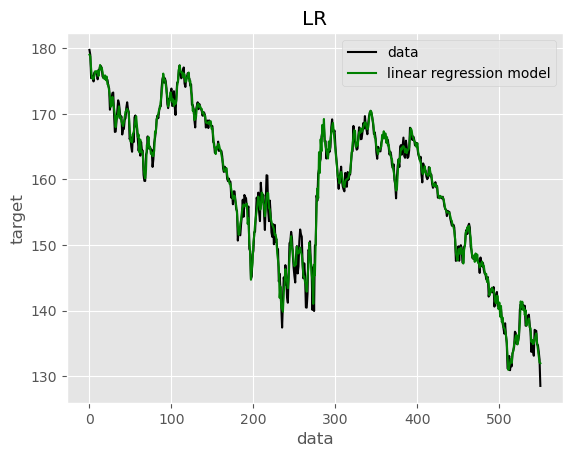

In [57]:
plt.plot(mean_actual,c='k',label='data')
plt.plot(mean_pre,c='g',label='linear regression model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('LR')
plt.legend()
plt.show()


In [58]:
# 傻瓜算法
stupid_actual = mean_actual
stupid_predict = [stupid_actual[0]]
stupid_predict[1:len(stupid_actual)] = stupid_actual[0:len(stupid_actual)-1]
print(len(stupid_actual))
print(len(stupid_predict))
print(stupid_actual)
print(stupid_predict)

551
551
[179.74, 179.015, 175.43, 175.6175, 175.82249999999996, 174.93499999999997, 176.31125000000003, 176.1625, 176.305, 176.39125, 175.25999999999996, 176.68625, 176.64624999999998, 177.26625, 177.26999999999998, 176.93875, 175.69125000000003, 175.49125, 175.51375, 175.73374999999996, 175.35, 175.2775, 175.16875, 174.27875, 173.87375, 170.625, 171.89250000000004, 172.41499999999996, 173.1625, 173.24625, 170.0025, 167.23625000000004, 167.28875000000002, 168.815, 170.33249999999998, 172.06375, 171.5975, 170.45875, 169.205, 169.5975, 166.845, 167.68125, 167.68375000000003, 169.0575, 169.33500000000004, 170.9475, 171.7525, 170.68875, 170.27, 166.12999999999997, 166.48125, 164.99875, 164.21500000000003, 166.8775, 165.68875, 169.46125000000004, 169.7475, 168.09749999999997, 167.85500000000002, 166.1375, 164.35999999999999, 165.5225, 163.61625, 165.70750000000004, 164.37375000000003, 164.39124999999999, 160.6875, 159.7725, 159.755, 163.79125000000002, 164.165, 166.5525, 164.7275, 165.085, 

In [59]:
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("mean_absolute_error:", mean_absolute_error(stupid_actual, stupid_predict))
print("mean_squared_error:", mean_squared_error(stupid_actual, stupid_predict))
print("rmse:", sqrt(mean_squared_error(stupid_actual, stupid_predict)))
print("r2 score:", r2_score(stupid_actual, stupid_predict))

mean_absolute_error: 1.2757395644283132
mean_squared_error: 3.289747600952822
rmse: 1.8137661373376728
r2 score: 0.976045695761424


In [60]:
trend_actual = []

for i in range(1, len(mean_actual)):
    tmp = mean_actual[i] - mean_actual[i-1]
    if tmp < 0: # down
        trend_actual.append(2)
    elif tmp > 0: # up
        trend_actual.append(0)
    else:
        trend_actual.append(1)

print(len(trend_actual))
trend_actual

550


[2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,


In [61]:
trend_predict = []

for i in range(1, len(mean_pre)):
    tmp = mean_pre[i] - mean_pre[i-1]
    if tmp < 0: # down
        trend_predict.append(2)
    elif tmp > 0: # up
        trend_predict.append(0)
    else:
        trend_predict.append(1)

print(len(trend_predict))
trend_predict

550


[2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,


In [36]:
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("mean_absolute_error:", mean_absolute_error(trend_actual, trend_predict))
print("mean_squared_error:", mean_squared_error(trend_actual, trend_predict))
print("rmse:", sqrt(mean_squared_error(trend_actual, trend_predict)))
print("r2 score:", r2_score(trend_actual, trend_predict))

mean_absolute_error: 0.6618181818181819
mean_squared_error: 1.3236363636363637
rmse: 1.1504939650586454
r2 score: -0.3385216089002996


In [62]:
same = 0
for i in range(0, len(trend_actual)):
    if trend_actual[i] == trend_predict[i]:
        same = same + 1
        
ratio = same/len(trend_actual)
ratio

0.6690909090909091

In [38]:
trend_actual = []

for i in range(1, len(stupid_actual)):
    tmp = stupid_actual[i] - stupid_actual[i-1]
    if tmp < 0: # down
        trend_actual.append(2)
    elif tmp > 0: # up
        trend_actual.append(0)
    else:
        trend_actual.append(1)

print(len(trend_actual))
trend_actual

550


[2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,


In [39]:
trend_predict = []

for i in range(1, len(stupid_predict)):
    tmp = stupid_predict[i] - stupid_predict[i-1]
    if tmp < 0: # down
        trend_predict.append(2)
    elif tmp > 0: # up
        trend_predict.append(0)
    else:
        trend_predict.append(1)

trend_predict

[1,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,


In [41]:
same = 0
up = []

for i in range(0, len(trend_actual)):
    if trend_actual[i] == trend_predict[i]:
        same = same + 1
        tmp = abs(mean_actual[i+1]-mean_actual[i])
        up.append(tmp)
        
ratio = same/len(trend_actual)
ratio

0.5290909090909091

In [42]:
profit = []

for i in range(0, len(trend_actual)):
    if trend_predict[i] == 2:  # down
        tmp = mean_pre[i]-mean_pre[i+1]
        profit.append(tmp)
    elif trend_predict[i] == 0:
        tmp = mean_pre[i+1]-mean_pre[i]
        profit.append(tmp)
   
print(mean_actual[0])
np.sum(profit)

205.41714285714286


299.0131149573974